In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
house_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
house_test_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_test_data.shape

(1459, 80)

In [5]:
house_data.shape

(1460, 81)

In [6]:
house_data.drop('Id', axis=1, inplace=True)
house_test_data.drop('Id', axis=1, inplace=True)

In [7]:
y = house_data['SalePrice'].reset_index(drop=True)

features_train = house_data.drop(['SalePrice'],axis=1)
print(y.shape)

(1460,)


In [8]:
features_test = house_test_data




In [9]:
features = pd.concat([features_train, features_test]).reset_index(drop=True)

features.shape

(2919, 79)

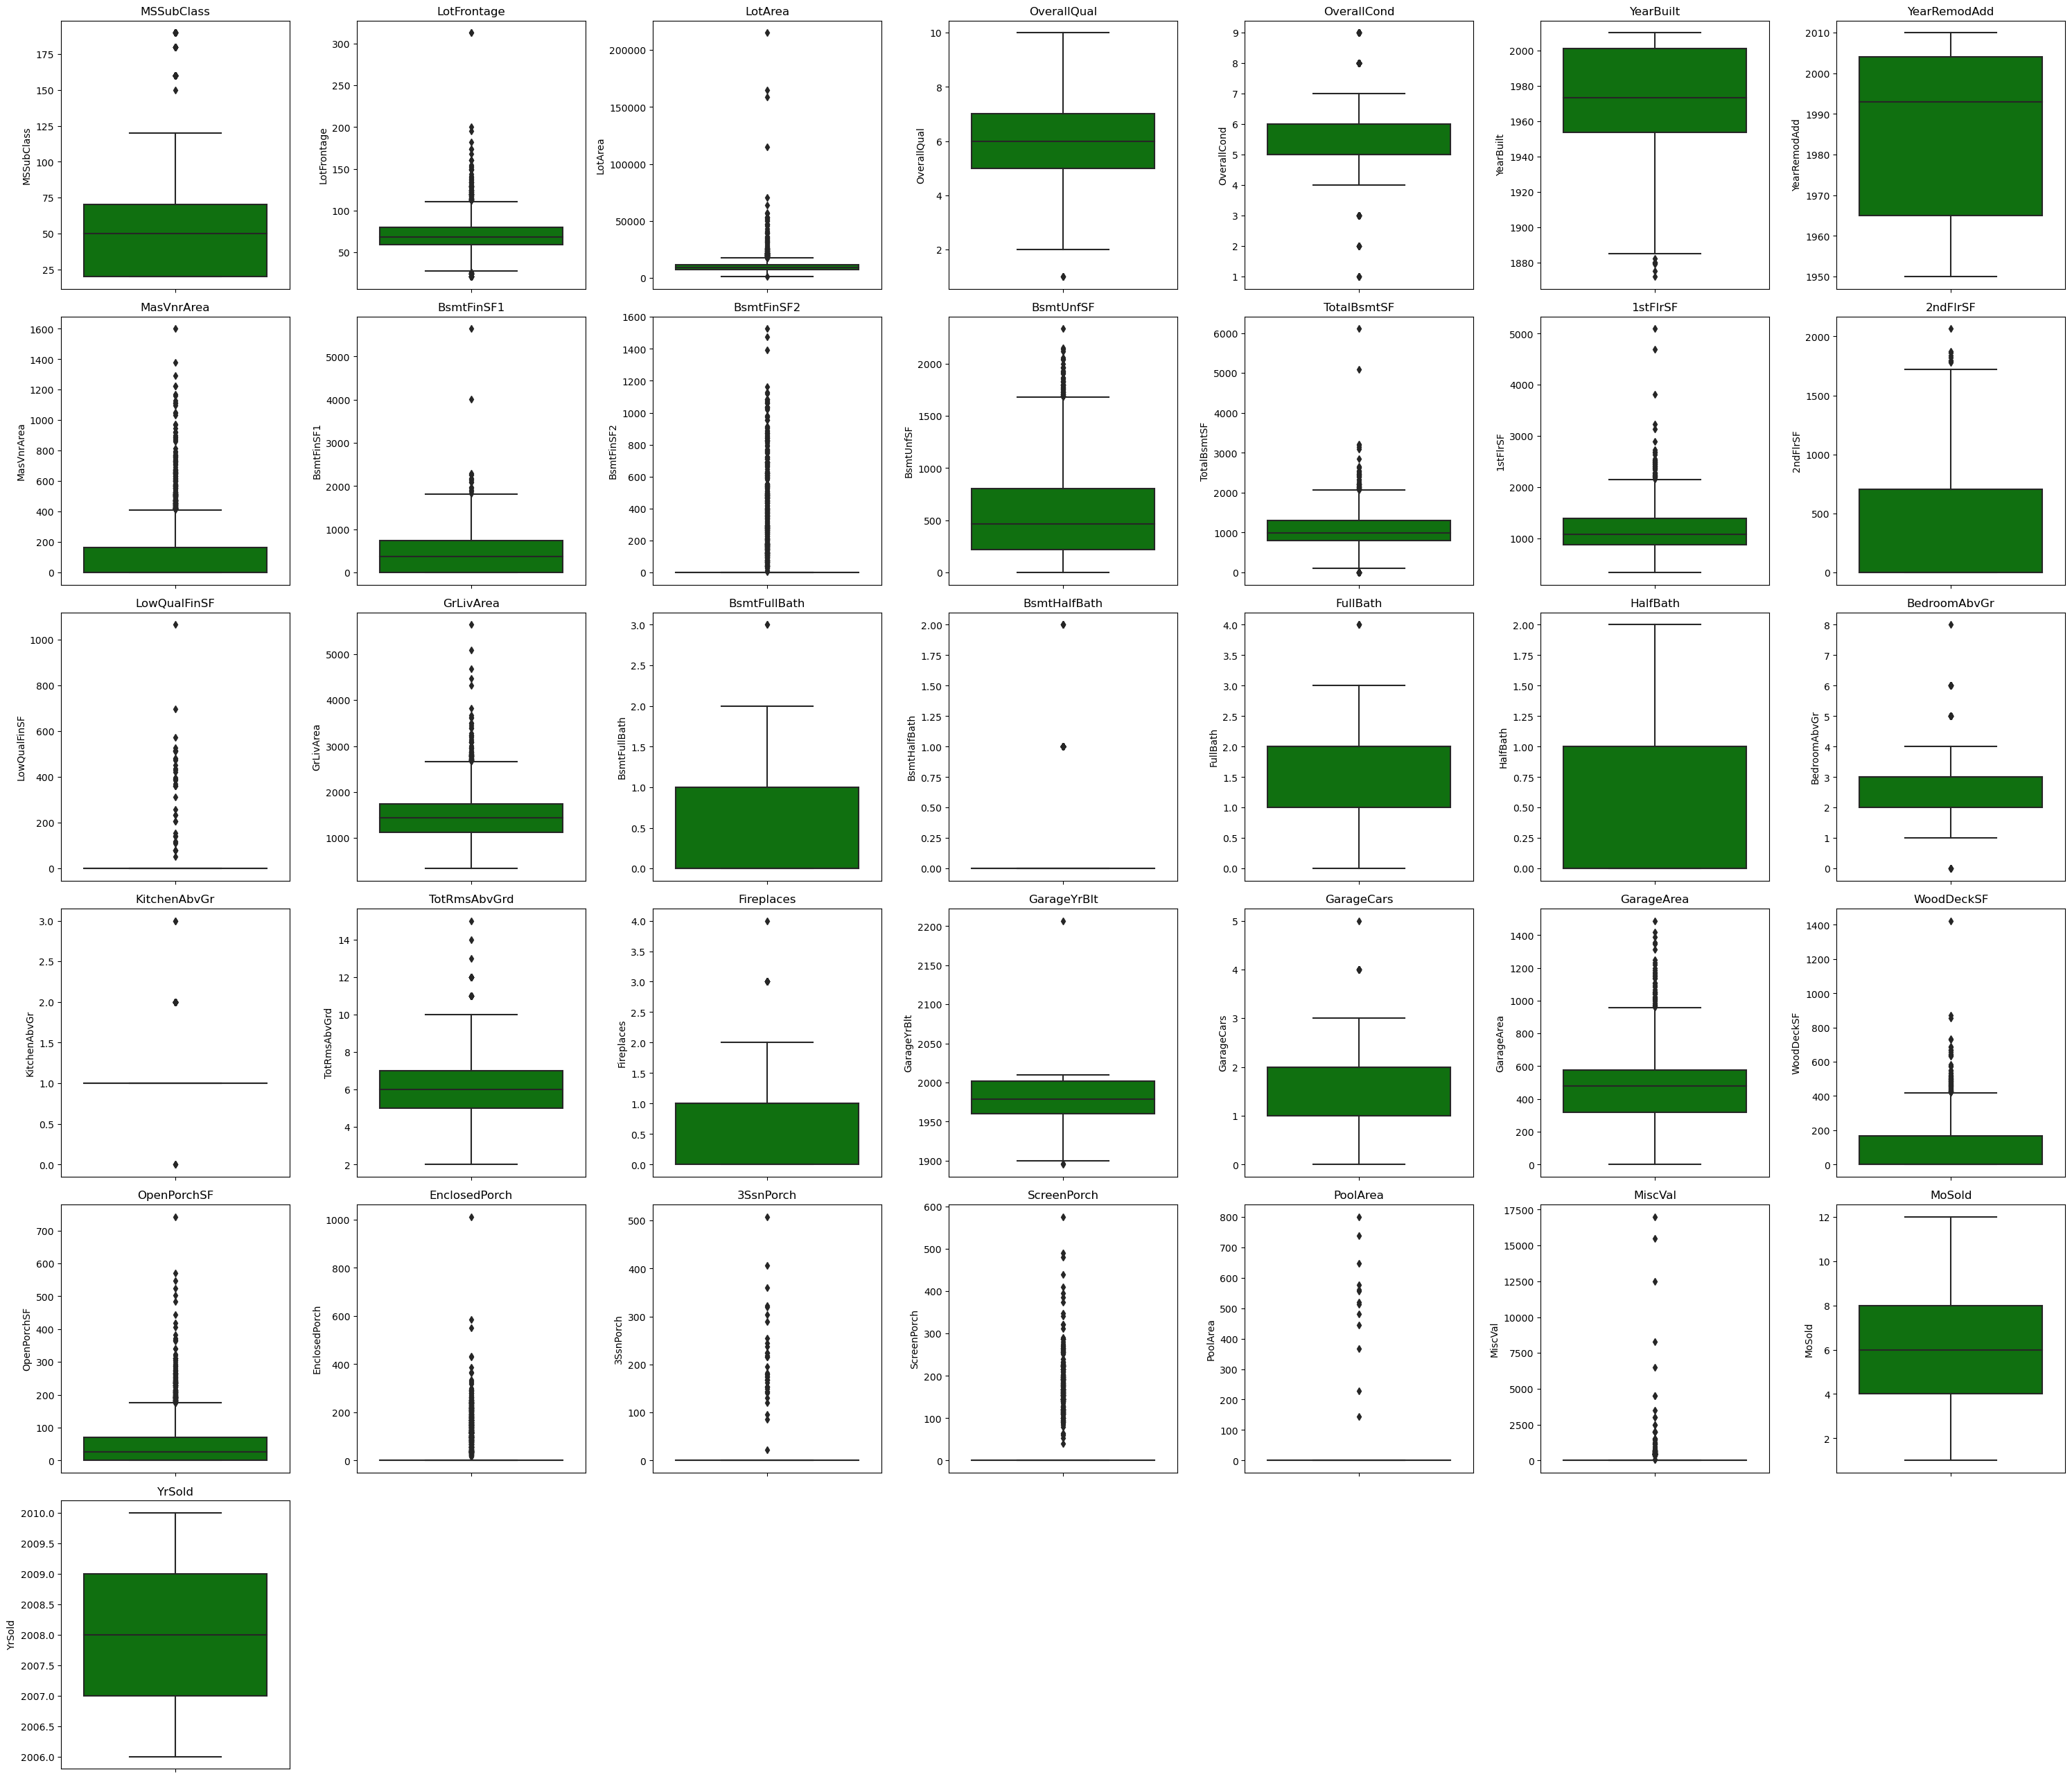

In [10]:
numeric_variables = features.select_dtypes(include=['number'])

# Create box plots for each numeric variable in a loop
plt.figure(figsize=(30, 30))

for i, variable in enumerate(numeric_variables, start=1):
    plt.subplot(7, 7, i)
    sns.boxplot(data=features, y=variable, color = 'green')
    plt.title(variable)

plt.tight_layout()
plt.show()

In [11]:
correlation_matrix = house_data.corr()
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


/tmp/ipykernel_20/1127177256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_data.corr()


In [12]:
correlation_matrix = features.corr()
high_correlations = correlation_matrix[correlation_matrix > 0.7]

# Display correlations between variables
print(high_correlations)

               MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass            1.0          NaN      NaN          NaN          NaN   
LotFrontage           NaN          1.0      NaN          NaN          NaN   
LotArea               NaN          NaN      1.0          NaN          NaN   
OverallQual           NaN          NaN      NaN          1.0          NaN   
OverallCond           NaN          NaN      NaN          NaN          1.0   
YearBuilt             NaN          NaN      NaN          NaN          NaN   
YearRemodAdd          NaN          NaN      NaN          NaN          NaN   
MasVnrArea            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF1            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF2            NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF             NaN          NaN      NaN          NaN          NaN   
TotalBsmtSF           NaN          NaN      NaN          NaN          NaN   

/tmp/ipykernel_20/1334351142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features.corr()


## As we can see, GarageArea and GarageCars have high correlation. Also, GarageYrBuilt and YearBlt. We can drop the ones that are less correlated with the target variable to reduce multicollinearity

In [13]:
features.drop(columns=['GarageArea','GarageYrBlt'],inplace=True)

In [14]:
features.shape

(2919, 77)

In [15]:
pd.set_option('display.max_rows', None)

null_stats = features.isnull().sum()

null_columns = null_stats[null_stats > 0]

null_percentage = (null_columns / features.shape[0]) * 100
null_percentage = null_percentage.fillna(0)

null_percentage

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageCars       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

## Cleaning up the missing data. 

### After reading data_description.txt we see that for some columns NaN mean that the particular feature is not there; we can replace it with None

#### Example: PoolQC

In [16]:
none_replace = ['MiscFeature','PoolQC','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','Alley']


features[none_replace] = features[none_replace].replace(np.nan, 'None')



features['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

## Similarly with other columns where NaN means 0, and others where NaN means the data is actually missing. Code here used from ERTUĞRUL DEMIR

In [17]:
# List of 'NaN' including columns where NaN's mean 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]


for col in zero_cols:
    features[col].replace(np.nan, 'None', inplace=True)

for col in freq_cols:
    features[col].replace(np.nan, features[col].mode()[0], inplace=True)

In [18]:
median_value = features['LotFrontage'].median()


features['LotFrontage'] = features['LotFrontage'].fillna(median_value)

features['MSZoning'].fillna(features['MSZoning'].mode()[0], inplace=True)


In [19]:
features.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

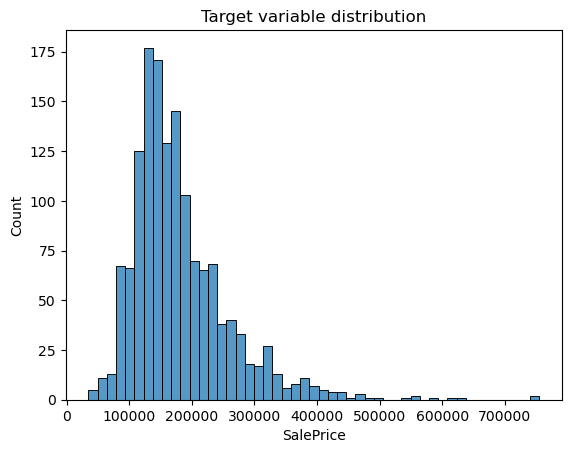

In [20]:
plt.figure()
sns.histplot(y)
plt.title('Target variable distribution')
plt.show()

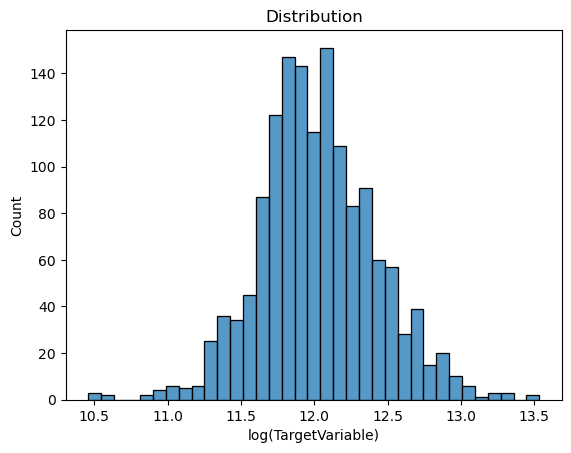

In [21]:
sns.histplot(np.log(y))
plt.title('Distribution')
plt.xlabel('log(TargetVariable)')
plt.show()

In [22]:
correlation_matrix = house_data.drop(columns=['SalePrice']).corr()
high_correlations = correlation_matrix[correlation_matrix > 0.7]

# Display correlations between variables
print(high_correlations)

               MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass            1.0          NaN      NaN          NaN          NaN   
LotFrontage           NaN          1.0      NaN          NaN          NaN   
LotArea               NaN          NaN      1.0          NaN          NaN   
OverallQual           NaN          NaN      NaN          1.0          NaN   
OverallCond           NaN          NaN      NaN          NaN          1.0   
YearBuilt             NaN          NaN      NaN          NaN          NaN   
YearRemodAdd          NaN          NaN      NaN          NaN          NaN   
MasVnrArea            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF1            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF2            NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF             NaN          NaN      NaN          NaN          NaN   
TotalBsmtSF           NaN          NaN      NaN          NaN          NaN   

/tmp/ipykernel_20/1728374537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_data.drop(columns=['SalePrice']).corr()


## As we can see, GarageArea and GarageCars have high correlation. Also, GarageYrBuilt and YearBlt. We can drop the ones that are less correlated with the target variable to reduce multicollinearity

In [23]:
house_data.drop(columns=['GarageArea','GarageYrBlt'],inplace=True)

In [24]:
if 'GarageArea' not in house_data.columns:
    print('Success!')

Success!
